In [57]:
from keras import models
from keras import layers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [58]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print 'Training data length:', len(train_data)
print 'Test data length:', len(test_data)

Training data length: 8982
Test data length: 2246


In [59]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [60]:
decoded_newswire

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [61]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [62]:
# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [63]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [64]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [80]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [81]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s - loss: 2.4925 - acc: 0.5208 - val_loss: 1.6495 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.3780 - acc: 0.7112 - val_loss: 1.2703 - val_acc: 0.7370
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0296 - acc: 0.7803 - val_loss: 1.1140 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8151 - acc: 0.8235 - val_loss: 1.0186 - val_acc: 0.7750
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6475 - acc: 0.8627 - val_loss: 0.9493 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5123 - acc: 0.8939 - val_loss: 0.9161 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4119 - acc: 0.9138 - val_loss: 0.8801 - val_acc: 0.8150
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.3326 - acc: 0.93

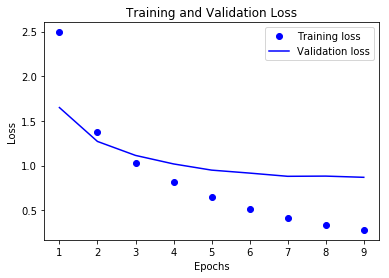

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

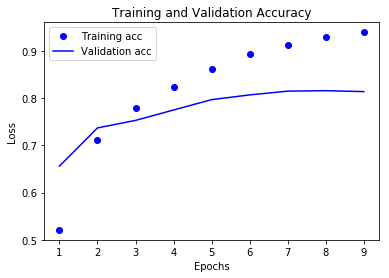

In [84]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
results = model.evaluate(x_test, one_hot_test_labels)

2048/2246 [==========================>...] - ETA: 0s

In [86]:
results

[0.98306439502474885, 0.79029385574354405]

In [87]:
# Simulating random classifier
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18165627782724844